# Traitement des données ANAE
---

Anaé est née le 24 juillet 2006. Elle a deux grands frères et est la dernière enfant de la famille. Sa mère est linguiste et son père est professeur d’anglais dans le secondaire. Anaé est une petite fille pétillante, têtue et pleine d’humour, qui partage une grande complicité avec sa maman. Aliyah Morgenstern et Marie Leroy la filment entre trente minutes et une heure par mois en situation naturelle depuis ses 1;04. Son développement langagier est assez rapide et Anaé fait preuve d’une grande créativité dans la construction de son langage, inventant ses propres règles notamment au niveau de la morphologie verbale ou du genre, parfois à l’encontre des explications de ses parents.

On peut maintenant utiliser le fichier 'data_adrien_final.csv' pour l'exploration de données.

# Imports 

In [1]:
import os 
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.varmax import VARMAX

## Lecture fichier final

In [2]:

data_child = pd.read_csv('data_anae_final.csv',
                           sep = '\t',
                           encoding = 'utf-8',
                           index_col=False)

# On supprime la colonne qui duplique les index
data_child = data_child.drop(columns = 'Unnamed: 0')

In [3]:
data_child.shape
data_child=data_child.sort_values(by = ['age','seconde_debut']) 

data_child.head()
data_child['ind']=[ i for i in range(len(data_child))]
data_child= data_child.set_index('ind')

# Exploration des données

---

Qu'elles sont les différents type de ligne ?

In [4]:
print(len(data_child['type'].unique()))

41


In [5]:
((data_child['type']=='pho')*1).describe()

count    98815.000000
mean         0.189809
std          0.392152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: type, dtype: float64

Il existe 41 types de ligne dans les fichiers Andrien :

In [6]:
print(data_child['type'].unique())

['AEL' 'MOT' 'CHI' 'ART' '+div+' 'interlocuteur' 'sit' 'com' 'pho' 'act'
 'xpnt' 'int' '-div-' 'add' 'FAT' 'OBS' 'VIS' 'xpol' 'ximi' 'imi' 'TOY'
 'gpx' 'xpt' 'UNK' 'exp' 'gls' 'sng' 'UNI' 'mor' 'npho' 'CAM' 'xpho' 'BOY'
 'FRI' 'ANO' 'AUN' 'UNC' 'YON' 'NOA' 'ADU' 'ADU2']


In [7]:
list( (data_child['type']=='pho')*1 ).count(1)

18756

In [8]:
data_child['type'].where(data_child['type']=='pho').dropna()

ind
816      pho
819      pho
821      pho
828      pho
831      pho
        ... 
96867    pho
96873    pho
96876    pho
96877    pho
96880    pho
Name: type, Length: 18756, dtype: object

In [9]:
data_child.iloc[96880]

enfant              ANAE
age              5_07_06
type                 pho
seconde_debut        NaN
seconde_fin          NaN
contenu                a
Name: 96880, dtype: object

## Les phonèmes

Les lignes de type 'pho' correspondent à la traduction phonétique lorsque d'Adrien s'exprime :
* Nous avons à disposition 18756 traductions pour Adrien 
* On distingue les premiers mots d'Adrien à l'age de un an 4 mois et 20 jours
* Les traductions s'arrêtent à l'age de 5 ans 7 mois et 06 jours

In [10]:
pho_child = data_child[data_child['type'] == 'pho']
#pho_child

In [54]:
data_child.replace(['START','END'],np.nan , inplace=True)
data_child[['seconde_debut','seconde_fin']].fillna(method='ffill',inplace=True)

In [55]:
data_child

,enfant,age,type,seconde_debut,seconde_fin,contenu
ind,,,,,,
0,ANAE,1_04_20,AEL,0,3,Arthur # regarde mon pain au lait .
1,ANAE,1_04_20,MOT,1001,1002,oui ?
2,ANAE,1_04_20,CHI,1002,1003,maman .
3,ANAE,1_04_20,MOT,1003,1004,qu' est+ce+qu' y+a ?
4,ANAE,1_04_20,MOT,1004,1007,ça c'est à Ael cette sucette .
...,...,...,...,...,...,...
98810,ANAE,5_10_30,com,NaN,NaN,OBS parle d'une voix particulière
98811,ANAE,5_10_30,act,NaN,NaN,CHI mange
98812,ANAE,5_10_30,act,NaN,NaN,CHI montre sa main à OBS


### Valeurs NaN

2 valeurs à lâcher 

In [56]:
pho_child.loc[pho_child['contenu'].isna()]

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,


In [59]:
#pho_child.drop([44550,44551],inplace=True)
pho_child['index']=[i for i in range(len(pho_child))]

/home/bob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
pho_child.set_index('index')

,enfant,age,type,seconde_debut,seconde_fin,contenu,année,mois,jour,nombre_mot_phonétique
index,,,,,,,,,,
0,ANAE,1_04_20,pho,NaN,NaN,mɔmɑ̃,1,04,20,1
1,ANAE,1_04_20,pho,NaN,NaN,kakatetəma,1,04,20,1
2,ANAE,1_04_20,pho,NaN,NaN,eːja,1,04,20,1
3,ANAE,1_04_20,pho,NaN,NaN,mmmnamna mnamnam,1,04,20,2
4,ANAE,1_04_20,pho,NaN,NaN,u,1,04,20,1
...,...,...,...,...,...,...,...,...,...,...
18749,ANAE,5_07_06,pho,NaN,NaN,e ty di zeʁo zɑ̃,5,07,06,5
18750,ANAE,5_07_06,pho,NaN,NaN,ta,5,07,06,1
18751,ANAE,5_07_06,pho,NaN,NaN,mə,5,07,06,1


Nous allons chercher à visualiser la quantité phonétique de données à disposition

## Visualisation des données phonétiques

### Ajout des colonnes 'année', 'mois' et 'jour'

On considère que la colonne age a pout format : x_xx_xx (année_mois_jour) ainsi :
* ``pho_child['age'][0:1]`` nous donne le nombre d'année
* ``pho_child['age'][2:4]`` nous donne le nombre de mois
* ``pho_child['age'][5:7]`` nous donne le nombre de jours

In [61]:
pho_child

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,
816,ANAE,1_04_20,pho,NaN,NaN,mɔmɑ̃,0,1,04,20,1
819,ANAE,1_04_20,pho,NaN,NaN,kakatetəma,1,1,04,20,1
821,ANAE,1_04_20,pho,NaN,NaN,eːja,2,1,04,20,1
828,ANAE,1_04_20,pho,NaN,NaN,mmmnamna mnamnam,3,1,04,20,2
831,ANAE,1_04_20,pho,NaN,NaN,u,4,1,04,20,1
...,...,...,...,...,...,...,...,...,...,...,...
96867,ANAE,5_07_06,pho,NaN,NaN,e ty di zeʁo zɑ̃,18749,5,07,06,5
96873,ANAE,5_07_06,pho,NaN,NaN,ta,18750,5,07,06,1
96876,ANAE,5_07_06,pho,NaN,NaN,mə,18751,5,07,06,1


In [62]:
# Ajout du nombre d'année
année_pho_child = pho_child.apply(lambda row: row['age'][0:1], axis=1)
pho_child['année'] = année_pho_child

# Ajout du nombre de mois
mois_pho_child = pho_child.apply(lambda row: row['age'][2:4], axis=1)
pho_child['mois'] = mois_pho_child

# Ajout du nombre de jour
jour_pho_child = pho_child.apply(lambda row: row['age'][5:7], axis=1)
pho_child['jour'] = jour_pho_child

/home/bob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/bob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/bob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [63]:
pho_child

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,
816,ANAE,1_04_20,pho,NaN,NaN,mɔmɑ̃,0,1,04,20,1
819,ANAE,1_04_20,pho,NaN,NaN,kakatetəma,1,1,04,20,1
821,ANAE,1_04_20,pho,NaN,NaN,eːja,2,1,04,20,1
828,ANAE,1_04_20,pho,NaN,NaN,mmmnamna mnamnam,3,1,04,20,2
831,ANAE,1_04_20,pho,NaN,NaN,u,4,1,04,20,1
...,...,...,...,...,...,...,...,...,...,...,...
96867,ANAE,5_07_06,pho,NaN,NaN,e ty di zeʁo zɑ̃,18749,5,07,06,5
96873,ANAE,5_07_06,pho,NaN,NaN,ta,18750,5,07,06,1
96876,ANAE,5_07_06,pho,NaN,NaN,mə,18751,5,07,06,1


## Quantité de données

Combien avons-nous de ligne pour chaque année ? mois ? jour ?

### Quantité de données par année

In [64]:
nb_phrase_annee = pho_child[{'année','contenu'}].groupby('année').count()
nb_phrase_annee.rename(columns={'contenu': 'nb_phrase'})

,nb_phrase
année,
1,2670
2,8235
3,4240
4,3032
5,577


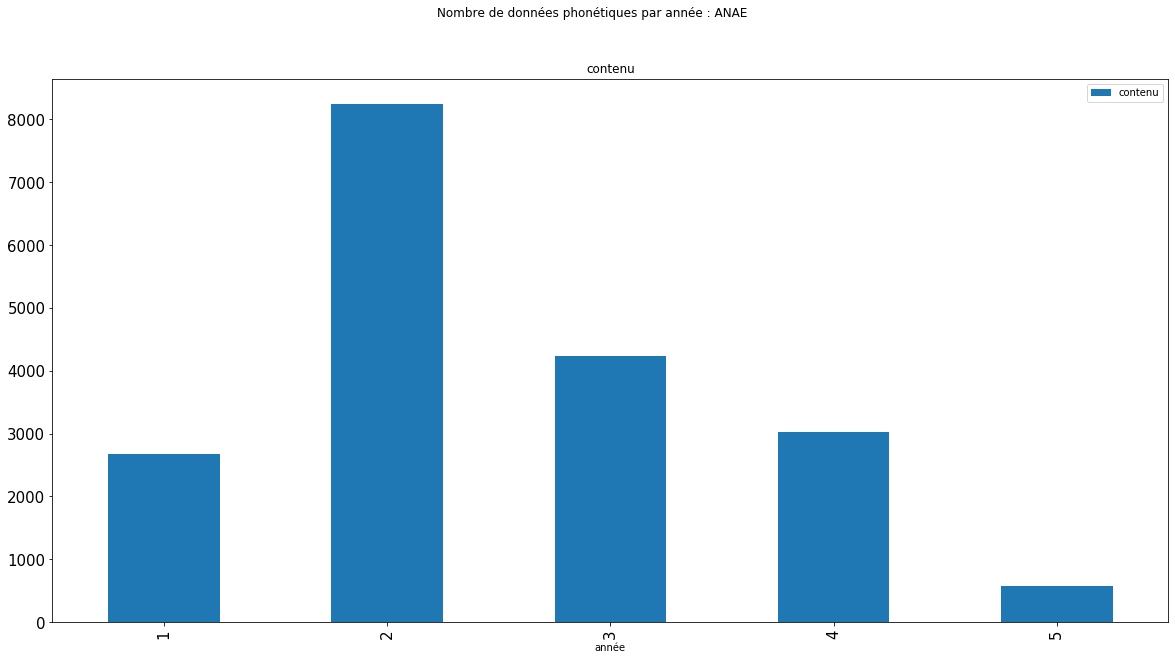

In [65]:
from matplotlib import pyplot as plt
nb_phrase_annee.plot(kind='bar', 
                       subplots=True, 
                       figsize=(20,10),
                       title = 'Nombre de données phonétiques par année : ANAE',
                       fontsize = 15,
                       use_index = True) 
plt.show()

On voit qu'il y a des quantités de données phonétiques différentes pour chaques années :
* Nous avons très peu de données pour la première année (230 lignes)
* Nous avons beaucoup de données la deuxième année (10705 lignes)
* Il y a de moins en moins de données la troisième puis la quatrième année (4360 puis 2203 lignes)

### Quantité de données par mois

Regardons plus en détail la quantité de données phonétiques par mois :

In [66]:
nb_phrase_mois = pho_child[{'année','mois','contenu'}].groupby(['année','mois']).count()
nb_phrase_mois = nb_phrase_mois.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_mois.unstack(level=1)

nb_phrase                                                            \
mois         00      01      02     03     04     05     06     07     08   
année                                                                       
1           NaN     NaN     NaN    NaN  225.0    NaN  774.0  944.0    NaN   
2        1485.0  1135.0  1139.0  499.0  532.0  560.0  608.0    NaN  824.0   
3           NaN   685.0     NaN  590.0  715.0  557.0  631.0    NaN  522.0   
4         748.0   606.0     NaN    NaN  584.0  567.0    NaN    NaN  527.0   
5           NaN   569.0     NaN    NaN    NaN    NaN    NaN    8.0    NaN   

                            
mois      09     10     11  
année                       
1      179.0  548.0    NaN  
2      403.0  533.0  517.0  
3        NaN  540.0    NaN  
4        NaN    NaN    NaN  
5        NaN    NaN    NaN

Nous avons que peu de lignes pour les mois :
* 1,03,xx
* 1,04,xx
* 1,11,xx

On voit aussi qu'il y a des mois sans données, cela vérifie qu'il y ait moins de données pour les années 0 et 4, en effet les retranscriptions s'arrête à l'age 4,03,xx

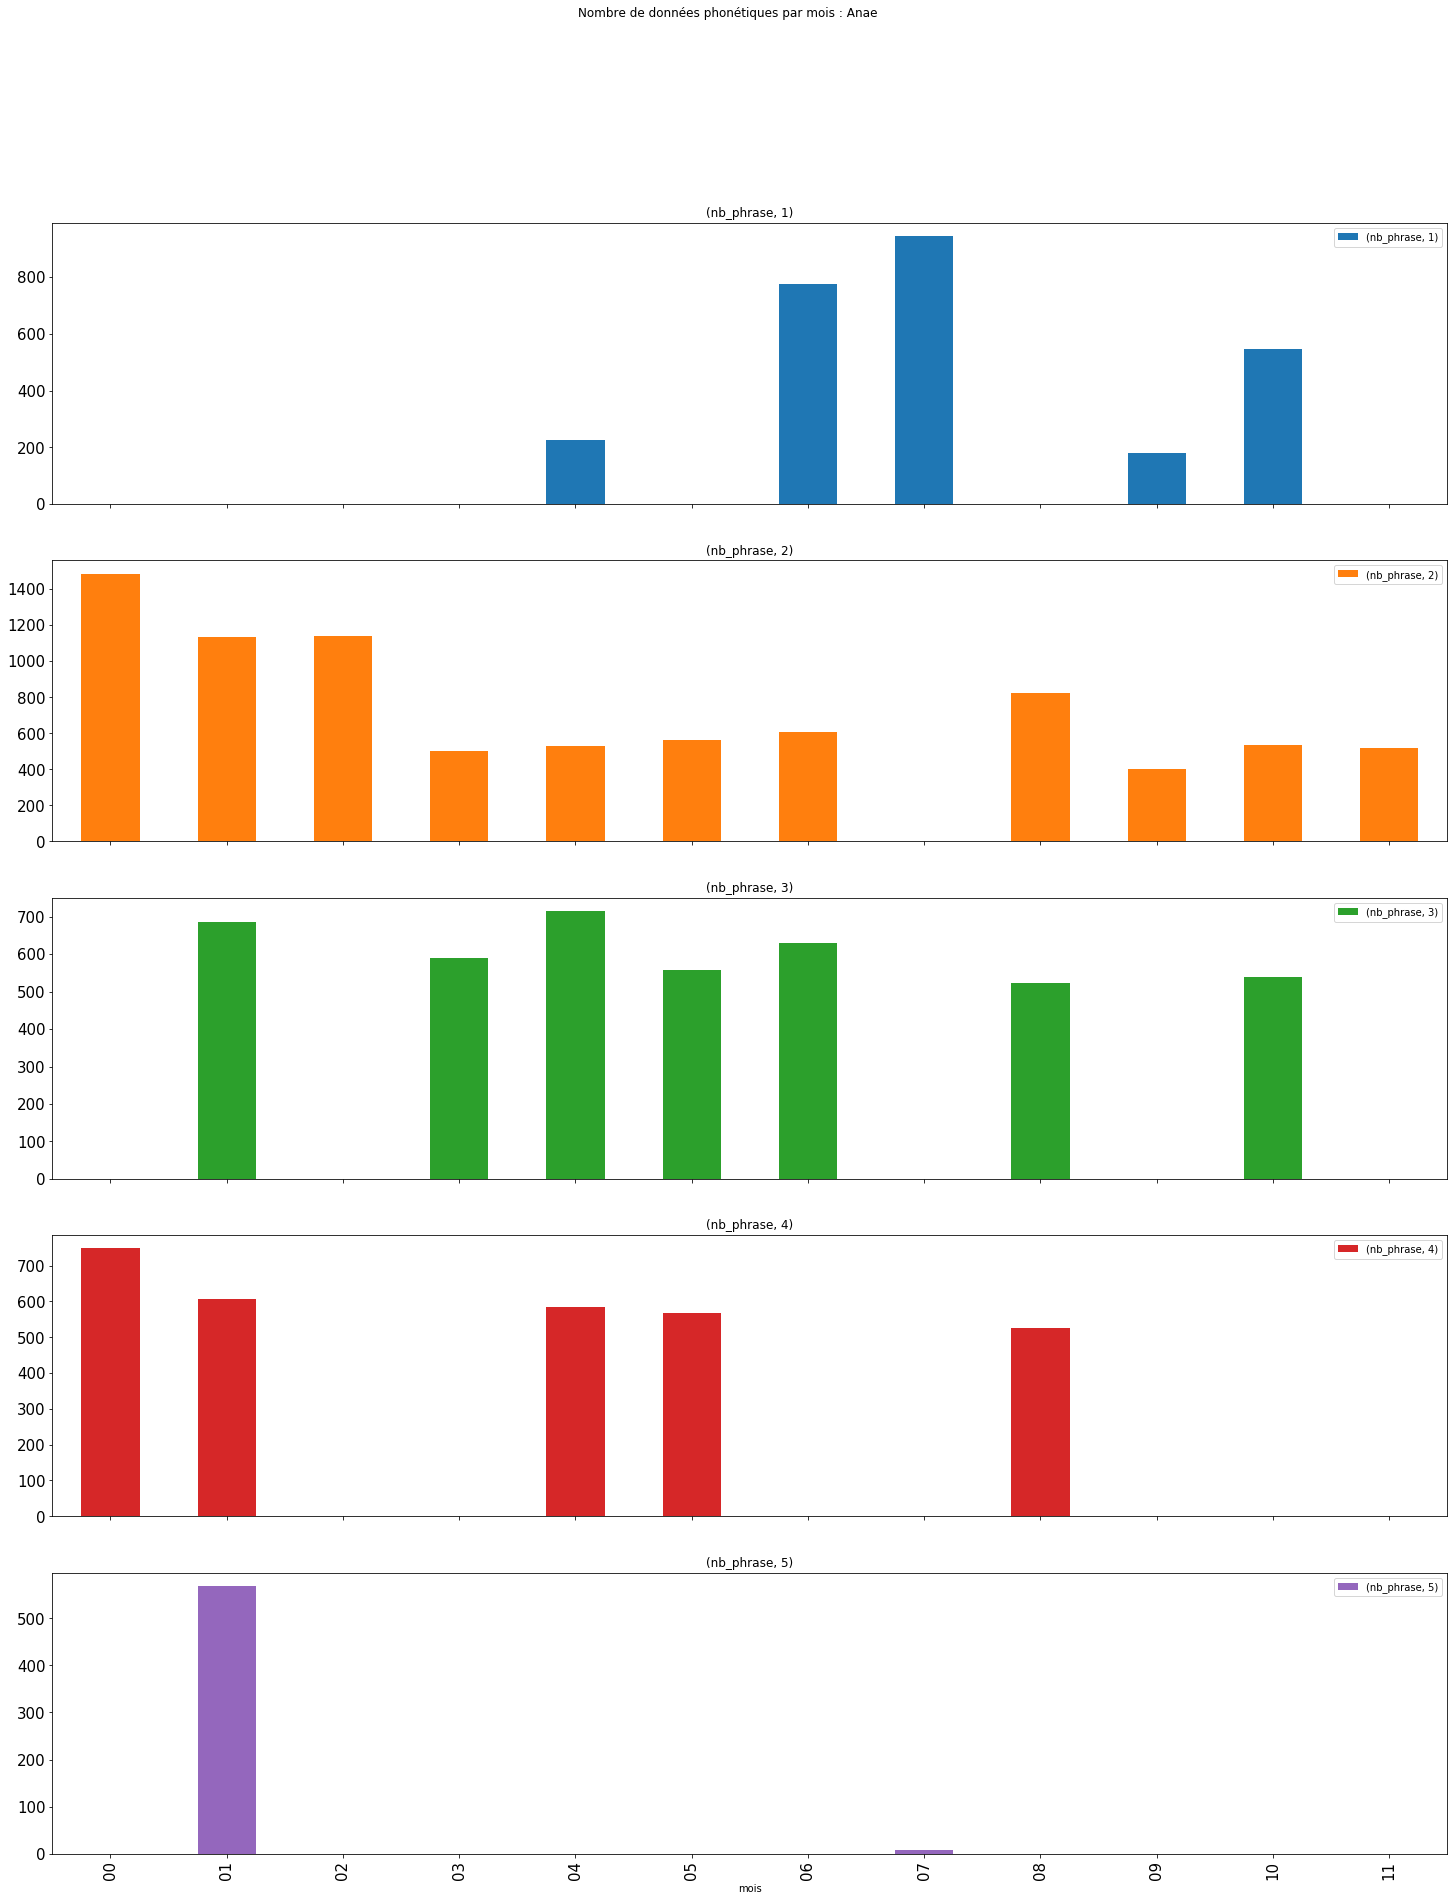

In [67]:
plt = nb_phrase_mois.unstack(level=0).plot(kind='bar', 
                                     subplots=True, 
                                     figsize=(25, 30),
                                     title = 'Nombre de données phonétiques par mois : Anae',
                                     fontsize = 15,
                                     use_index = True)

On voit qu'il y a moins d'enregistrements effectués sur Julie la troisième année et surtout sur les quatrième et cinquième année (en effet elles ne contiennent qu'un mois avec une quantité de données significative)

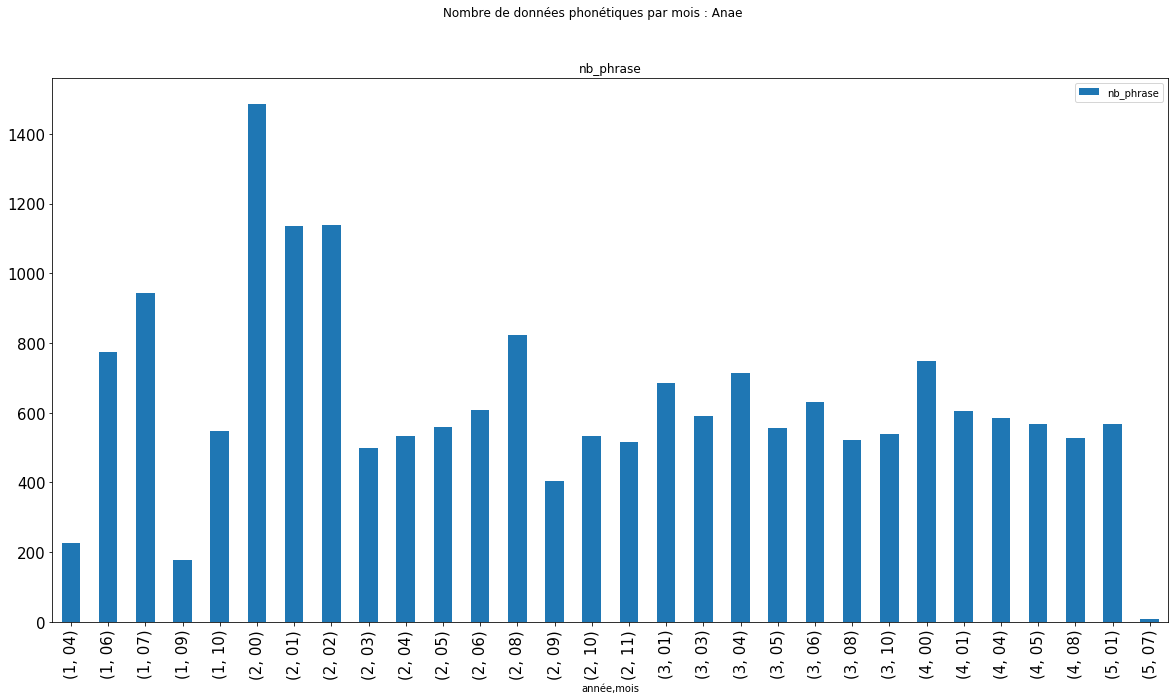

In [68]:
plt = nb_phrase_mois.plot(kind='bar',
                    subplots=True, 
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par mois : Anae',
                    fontsize = 15,
                    use_index = True)

### Quantité de données par jour

Regardons maintenant la quantité de données par jours :

In [69]:
nb_phrase_jour = pho_child[{'année','mois', 'jour', 'contenu'}].groupby(['année','mois', 'jour']).count()
nb_phrase_jour = nb_phrase_jour.rename(columns={'contenu': 'nb_phrase'})
nb_phrase_jour

nb_phrase
année mois jour           
1     04   20          225
      06   08          774
      07   03          944
      09   04          179
      10   18          548
2     00   00         1200
           26          285
      01   05         1135
      02   16         1139
      03   30          499
      04   28          532
      05   30          560
      06   27          608
      08   04          824
      09   23          403
      10   24          533
      11   22          517
3     01   07          685
      03   00          590
      04   27          715
      05   22          557
      06   27          631
      08   10          522
      10   00          540
4     00   13          748
      01   18          606
      04   10          584
      05   24          567
      08   09          527
5     01   21          569
      07   06            8

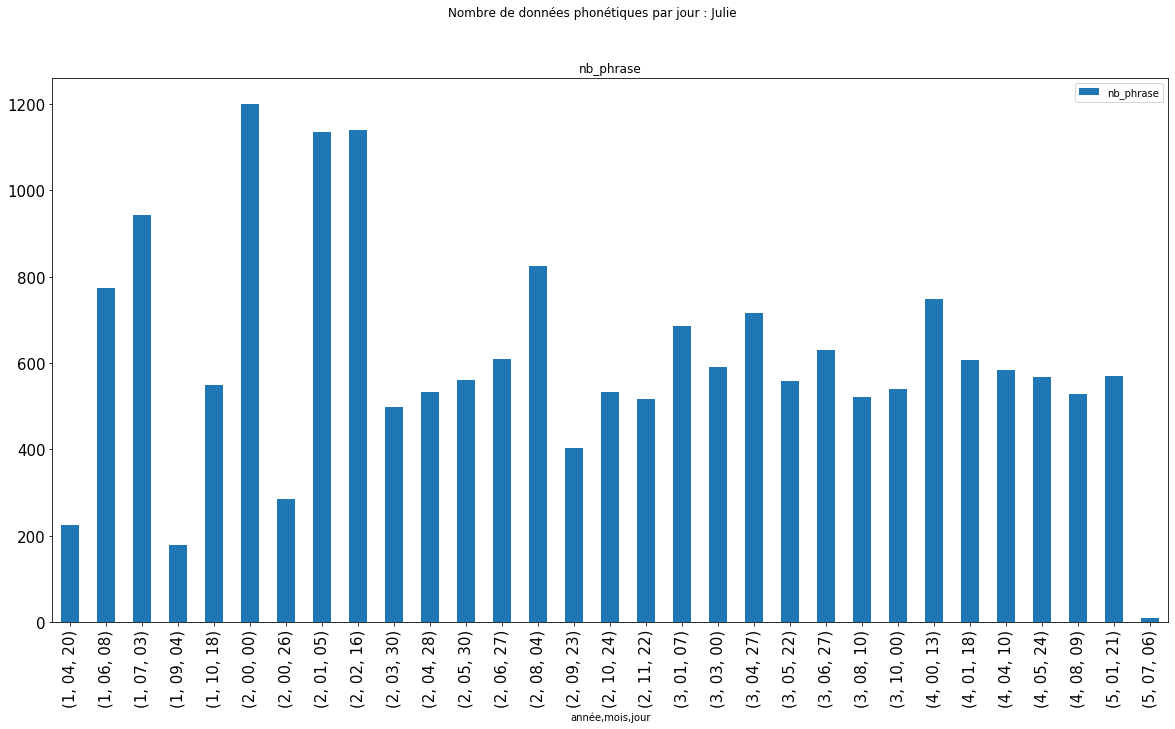

In [70]:
plt = nb_phrase_jour.plot(kind='bar',
                    subplots=True,
                    figsize=(20, 10),
                    title = 'Nombre de données phonétiques par jour : Julie',
                    fontsize = 15,
                    use_index = True)

De cette manière la distribution de la quantité de données phonétique n'est pas continu. En effet nous avons découpé les données de tel sorte à avoir la quantité de données pour chaque retranscription d'Adrien. On remarque des valeurs fluctu : il serait interressant d'observer de plus près pour connaitre les raisons de cette fluctuation : 

* Est-ce du à la durée d'enregistrement ?
* Est-ce du à un problème technique ?
* Est-ce du à l'enfant ?

De plus elle n'est pas distribué de manière équitable dans le temps. <br>
On peut difficelement mesurer la croissance du nombre de prise de parole (on pourrait croiser cette donnée avec la durée de l'enregistrement pour une meilleure mesure). <br>

On a maintenant une meilleure vision de la quantité de données phonétiques à disposition et de leur répartition dans le temps pour Adrien.

## Nombre de mot
Nous allons chercher à explorer le nombre de mot au sens phonétique par phrase. <br>
Pour cela on peut compter le nombre d'espace dans la chaîne de caractère :

In [71]:
pho_child

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,
816,ANAE,1_04_20,pho,NaN,NaN,mɔmɑ̃,0,1,04,20,1
819,ANAE,1_04_20,pho,NaN,NaN,kakatetəma,1,1,04,20,1
821,ANAE,1_04_20,pho,NaN,NaN,eːja,2,1,04,20,1
828,ANAE,1_04_20,pho,NaN,NaN,mmmnamna mnamnam,3,1,04,20,2
831,ANAE,1_04_20,pho,NaN,NaN,u,4,1,04,20,1
...,...,...,...,...,...,...,...,...,...,...,...
96867,ANAE,5_07_06,pho,NaN,NaN,e ty di zeʁo zɑ̃,18749,5,07,06,5
96873,ANAE,5_07_06,pho,NaN,NaN,ta,18750,5,07,06,1
96876,ANAE,5_07_06,pho,NaN,NaN,mə,18751,5,07,06,1


In [72]:
# Exemple 
pho = pho_child.at[850, 'contenu']
print('Nombre de mot dans "' + pho + ' : '+ str(pho.count(' ')+1))

Nombre de mot dans "mamɑ̃ : 1


Pour chaque ligne on calcul le nombre de mot phonétique :

In [73]:
nb_mot_pho = pho_child.apply(lambda row: row['contenu'].count(' ')+1, axis=1)
pho_child['nombre_mot_phonétique'] = nb_mot_pho #On ajoute une colonne contenant le nombre de mot

/home/bob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Par exemple on peut avoir la phrase de Julie avec le plus grand nombre de mot :

In [74]:
a = pho_child.loc[pho_child['nombre_mot_phonétique'] == pho_child['nombre_mot_phonétique'].max()].contenu.values
print(a)
print('longueur: '+str(str(a).count(' ')+1))

['me X dɑ̃ pətizami ja ja X e ja dɛ ʁɔlœʁ e ja yn vwatyʁ ki e ki e ki e ki e ki e ki e ki e dɑ̃z dɑ̃ də dəsy œ̃ naʁbʁ e e e apʁɛ ba ba X ba ba j avɛ j avɛ j avɛ kɛl javɛ ɛ̃ pətiammii ki ki ki a mi de zɛl a la vwatyʁ e ɛ s e ɛ e javɛ kɛlkɛ̃ ki metɛ ɛ̃ kusɛ̃ puʁ pa lɥi fɛʁ mal']
longueur: 81


Voici la ligne de cette phrase :

In [75]:
pho_child.loc[pho_child['nombre_mot_phonétique'] == 81 ]

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,
75757,ANAE,3_10_00,pho,NaN,NaN,me X dɑ̃ pətizami ja ja X e ja dɛ ʁɔlœʁ e ja y...,14850,3,10,00,81


### Espérance de mot par phrase

In [76]:
mean_nb_mot_pho_jour = pho_child[{'année', 'mois', 'jour', 'nombre_mot_phonétique'}].groupby(['année', 'mois', 'jour']).mean()
mean_nb_mot_pho_jour = mean_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'espérance_nombre_de_mot_phonétique'})
#mean_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f5613290>],
      dtype=object)

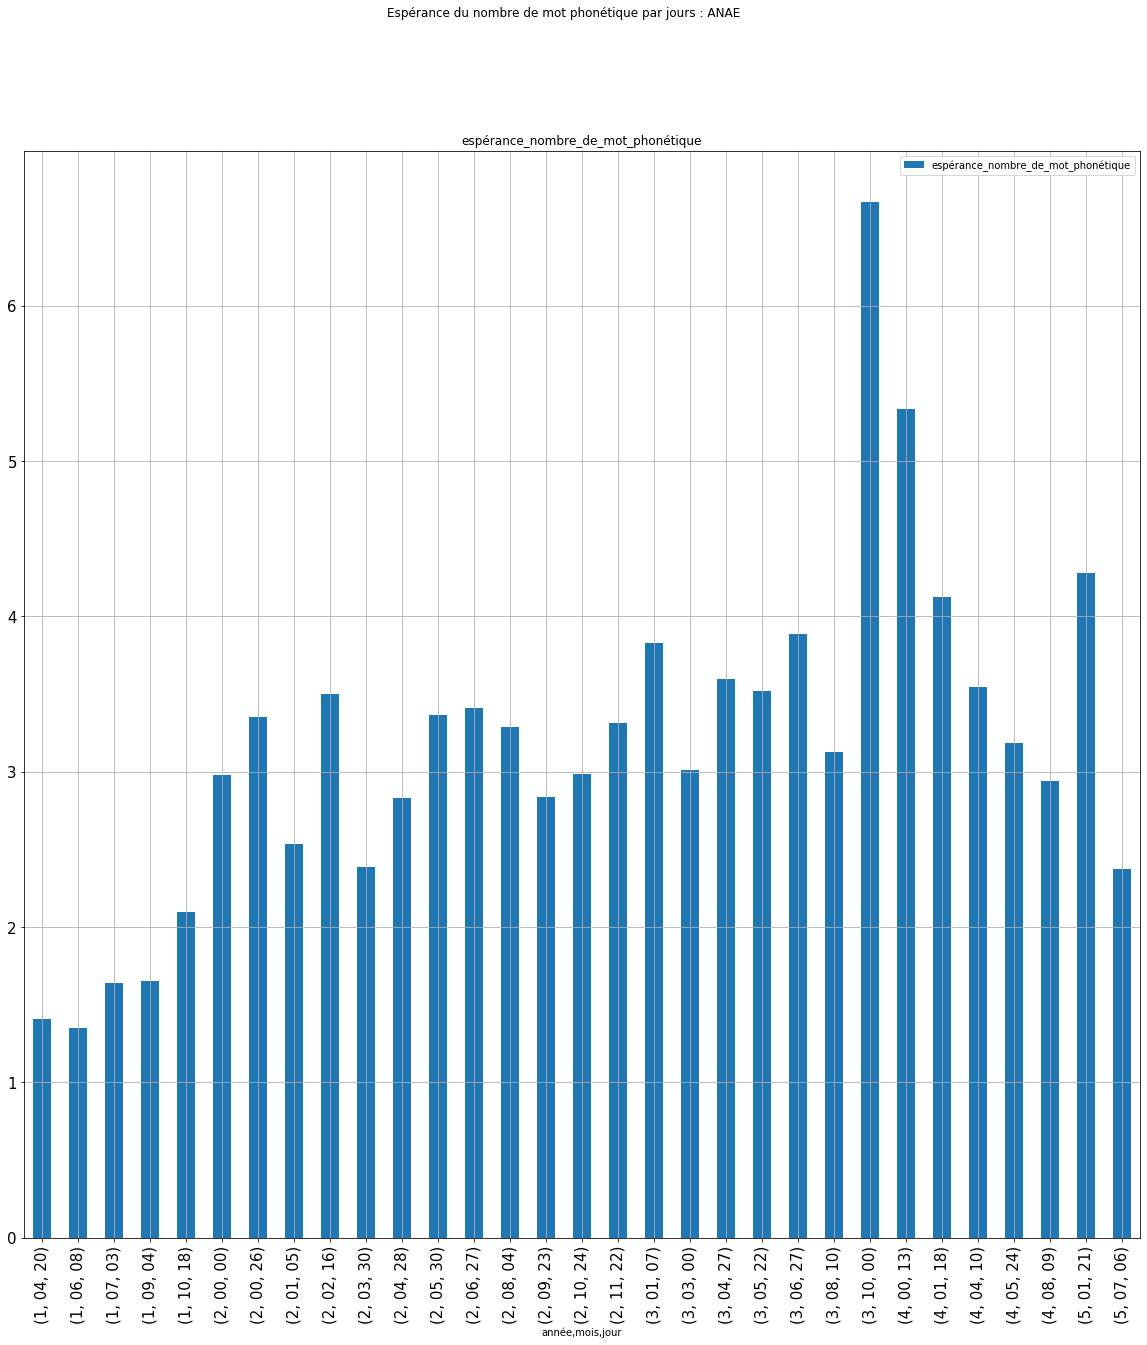

In [77]:
mean_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Espérance du nombre de mot phonétique par jours : ANAE',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

* On constaste une distribution de l'espérance étrange

### Variance du nombre de mot par phrase

In [78]:
var_nb_mot_pho_jour = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois', 'jour']).var()
var_nb_mot_pho_jour = var_nb_mot_pho_jour.rename(columns={'nombre_mot_phonétique': 'variance'})
#var_nb_mot_pho_jour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1f649e1d0>],
      dtype=object)

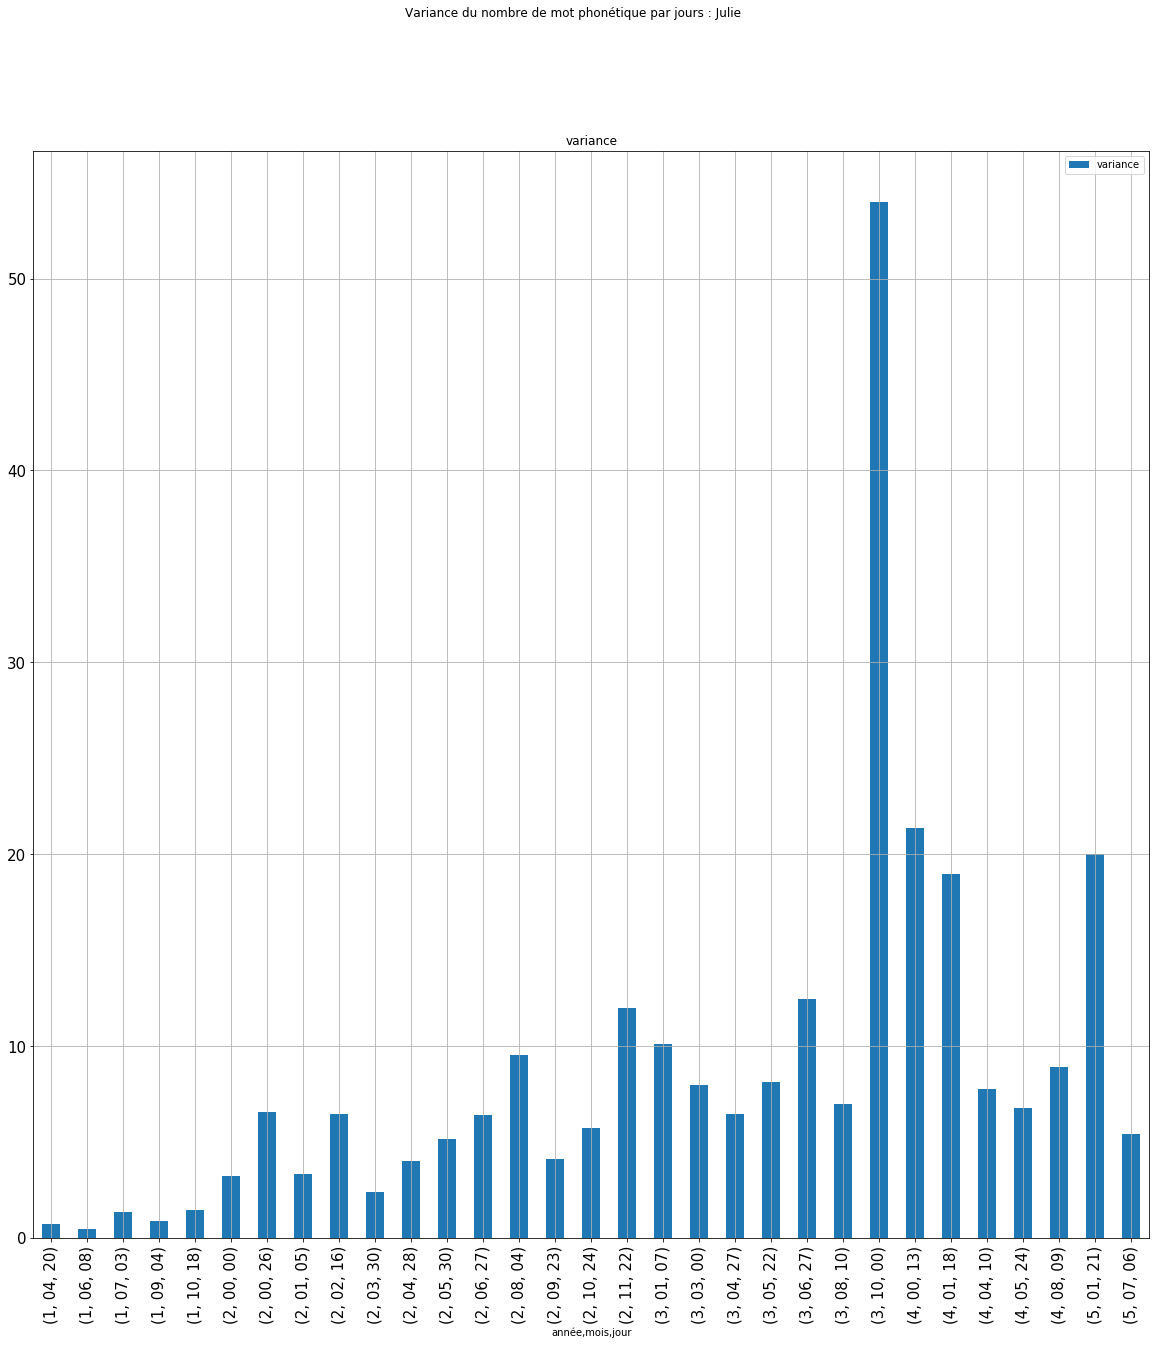

In [79]:
var_nb_mot_pho_jour.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Variance du nombre de mot phonétique par jours : Julie',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

### Plus grande phrase 

In [80]:
max_mot_pho_child = pho_child[{'année','mois','jour', 'nombre_mot_phonétique'}].groupby(['année','mois','jour']).max()
max_mot_pho_child = max_mot_pho_child.rename(columns={'nombre_mot_phonétique': 'longueur_max'})
#max_mot_pho_child

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2006f5a90>],
      dtype=object)

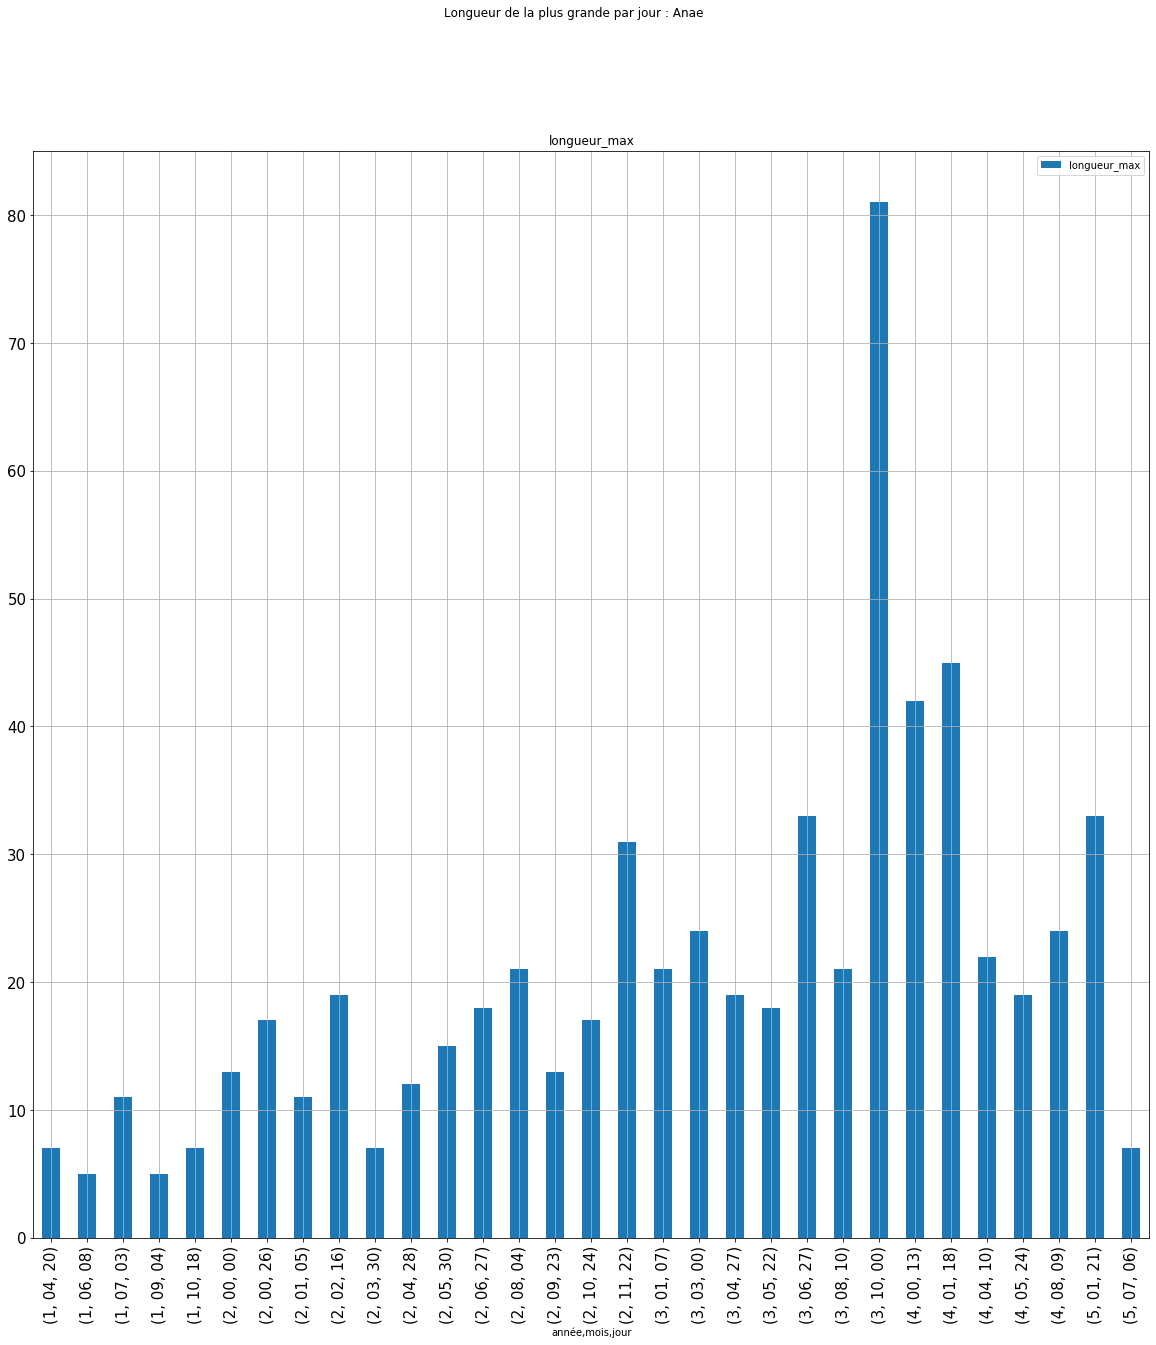

In [81]:
max_mot_pho_child.plot(kind='bar', 
                            subplots=True, 
                            figsize=(20, 20),
                            title = 'Longueur de la plus grande par jour : Anae',
                            fontsize = 15,
                            use_index = True,
                            grid=True)

On constate encore une distribution étrange

In [82]:
#Exemple: selection des phrases de 12 mots à l'age 2,xx,xx
pho_child.loc[pho_child['année'] == '2'].loc[pho_child.loc[pho_child['année'] == '2']['nombre_mot_phonétique'] == 12]

,enfant,age,type,seconde_debut,seconde_fin,contenu,index,année,mois,jour,nombre_mot_phonétique
ind,,,,,,,,,,,
18912,ANAE,2_00_26,pho,NaN,NaN,sa sa sɛ a a kɔlɑ̃ pu mɛt a o a bobo,4010,2,00,26,12
25886,ANAE,2_02_16,pho,NaN,NaN,i i i i i i il vø pa avɛk sɔ̃ li,5391,2,02,16,12
25887,ANAE,2_02_16,pho,NaN,NaN,i i i i i i il vø pa avɛk sɔ̃ li,5392,2,02,16,12
26116,ANAE,2_02_16,pho,NaN,NaN,e sa se m lə X sa se se ki ki mɔ̃t,5477,2,02,16,12
26118,ANAE,2_02_16,pho,NaN,NaN,e sa se m lə $ sa se se ki ki mɔ̃t,5478,2,02,16,12
33999,ANAE,2_04_28,pho,NaN,NaN,alja ty vø ɛ̃ ga ty vø mamɑ̃ ty vø ɛ̃ gato,6992,2,04,28,12
41146,ANAE,2_06_27,pho,NaN,NaN,me nɔ̃ ʒ a pa œ̃̃ piʒama ʁoz ʒ a œ̃̃ pizama,8620,2,06,27,12
43184,ANAE,2_08_04,pho,NaN,NaN,e fo pa mɛt la lə tʁyk dəsy se fo fo pa,8684,2,08,04,12
43185,ANAE,2_08_04,pho,NaN,NaN,e fo pa mɛt la lə tʁyk dəsy se fo fo pa,8685,2,08,04,12


### Gestion de l'encodage

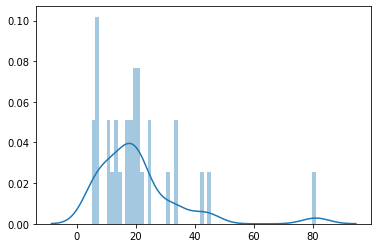

In [83]:
import seaborn as sns
sns.distplot(max_mot_pho_child,bins=60)

In [84]:
#data_antoine_final = pd.read_csv('data_antoine_final.csv', encoding=result['encoding'])
#data_antoine_final 
from statsmodels.tsa.seasonal import seasonal_decompose  
SEAS= seasonal_decompose(max_mot_pho_child, freq=4 ,model='additive',extrapolate_trend=1)

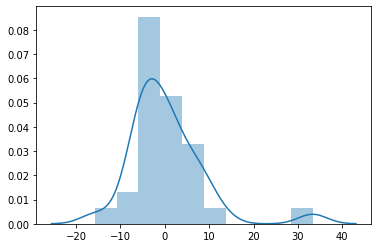

In [85]:
max_mot_pho_child.shape
sns.distplot(SEAS.resid)

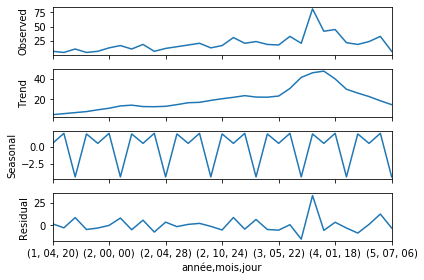

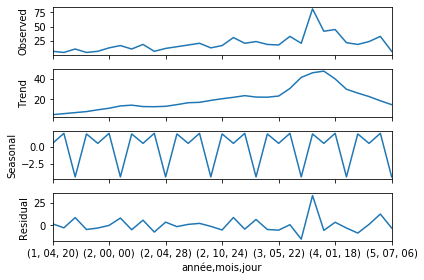

In [86]:
SEAS.plot()